In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/telco_churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   object 
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [ ]:
pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.Churn.value_counts()

,count
Churn,
False,2219
No,1487
True,780
Yes,556


# Problem Statement

**PROMPT**: A detailed description of the problem. Specify the goals and potential benefits for the decision-makers (who are the decision-makers?); some background on the context, etc.

**My response:** Telco, a telecommunications company that offers a variety of services to their customers, has just looked over some of their customer data. They realize roughly 26% of the 5043 customers in there database have decide to end their contract with the company and defect to the competition. They would like to find a way to bring the churn rate down by 5-10%.

It is more costly for the company to lose a customer than to keep one of course (when a customer leaves, Telco loses the recurring revenues that the customer carries with them).

The board of directors are unsure what customer characteristics are most contributing to them defecting and would like a better understanding of the factors that are contributing to customer churn.

Using past data, they would like me to design a model that is able to predict propensity rates of which customers in their database are most likely to churn. Moreover, they would like me to propose solutions to the marketing and sales department to reduce overall churn rates going into the next fiscal year.

**NOTE**: I have decided to work with the version of the dataset found above because it appear to be untidier than the version found on Kaggle (although the Kaggle version has more rows). Because the messier version offers me more room to practice cleaning data, that is the one I will apply for fitting and traning my model. However, I will later use the additional records that are not found in the version I am using to provide an unbiased test assessment for my model later on during my analysis. Here is a link to the Kaggle version (it has 7043 customer records). https://www.kaggle.com/datasets/blastchar/telco-customer-churn.

In [ ]:
pd.set_option('display.max_columns', df.shape[1])

In [ ]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [ ]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

# Data Selection

The data I am using for this project is the *Telco Customer Churn* dataset. It can be found here: https://github.com/KimathiNewton/Telco-Customer-Churn/blob/master/Datasets/telco_churn.csv. It is a solid dataset to use for applying classification algorithms and relevant metrics. Moreover, there are a number of features in the dataset that will need to be handled accordingly to be able to effectively perform my data mining techniques.

The dataset includes various features:

 - **CustomerID**: The unique identifier (primary key) of the customer.

 - **Gender**: Gender of Customer (Male or Female)

 - **SeniorCitizen**: Whether or not the customer is idenfied as a senior citizen

 - **Partner**: Whether or not the customer has a partner

 - **Dependents**: Whether the customer has dependents or not

 - **Tenure**: Number of months the customer has stayed with the company.

 - **PhoneService**: Whether the customer has subscripted to a phone service with the company.

 - **MultipleLines**: Whether or not the customer has multiple phone lines with the company.

 - **InternetService**: Whether the customer has an internet service (Telco offers DSL and Fiber Optic)

 - **Online Security**: Whether the customer has the Online Security add on

 - **OnlineBackup**: Whether the customer subscriped to Online Backup

 - **Device Protection**: Whether the customer subscribed to device protection.

 - **TechSupport**: Whether the customer subscribed to receive Tech Support

 - **StreamingTV**L Whether the customer subscribed to receive streaming television.

 - **StreamingMovies**: Whether or not the customer subscribed to stream movies with their plan.

 - **Contract**: The contract-term length of the customer (Month-to-Month, One year, Two Year)

 - **PaperlessBilling**: Whether the customer has paperless billing feature or not.

 - **PaymentMethod**: How the customer pays (Electronic check, Mailed Check, Automatic Bank Transfer, or Credit Card)

 - **MonthlyCharges**: The amount charged to the customer monthly.

 - **TotalCharges**: The total amount charged to the customer.

 - **Churn**: Whether the customer churned or not.

# Data Pre-Processing

What operations did you perform on your data to organize it into a form sutable for analysis. Specify any queries, transformations, how you treat missing values, etc.

In [ ]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


## Dropping redundant column

In [ ]:
df.drop([col for col in df if col.startswith('Unnamed:')], axis=1, inplace=True)

## Adjusting columns to be easier to access and consistently formatted

In [ ]:
df.columns = [col[:1].lower()+col[1:] for col in df.columns]

## Setting CustomerID as the Primary Key

In [ ]:
df.set_index('customerID', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   seniorCitizen     5043 non-null   object 
 2   partner           5043 non-null   object 
 3   dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   phoneService      5043 non-null   object 
 6   multipleLines     4774 non-null   object 
 7   internetService   5043 non-null   object 
 8   onlineSecurity    4392 non-null   object 
 9   onlineBackup      4392 non-null   object 
 10  deviceProtection  4392 non-null   object 
 11  techSupport       4392 non-null   object 
 12  streamingTV       4392 non-null   object 
 13  streamingMovies   4392 non-null   object 
 14  contract          5043 non-null   object 
 15  paperlessBilling  5043 non-null   object 
 16  paymentMethod     5043 non-null 

## Analyzing Variables of 'Object' Data Type that one would expect to contain Boolean or Integer Values


In [ ]:
def get_valueCounts(col):
  return df[col].value_counts()

In [ ]:
get_valueCounts('seniorCitizen')

,count
seniorCitizen,
False,2525
0,1699
True,475
1,344


## Replacing binary string values with their identical Boolean values

In [ ]:
df = df.replace('False', False).replace('True', True).replace('No',False).replace('Yes', True)

<ipython-input-16-fdf9f1faf937>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('False', False).replace('True', True).replace('No',False).replace('Yes', True)


## Removing the response variable from the dataset temporarily

In [ ]:
response = df.pop('churn')

In [ ]:
response.tail()

,churn
customerID,
6840-RESVB,False
2234-XADUH,False
4801-JZAZL,False
8361-LTMKD,True
3186-AJIEK,False


In [ ]:
df.index

Index(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
       '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
       ...
       '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
       '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK'],
      dtype='object', name='customerID', length=5043)

## Transforming string 0's and 1's into their boolean values

In [ ]:
df['seniorCitizen'] = df.seniorCitizen.replace('0', False).replace('1', True)

<ipython-input-20-a1fd1b3a1c16>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['seniorCitizen'] = df.seniorCitizen.replace('0', False).replace('1', True)


## Changed Pandas settings to only display two decimal places within the data frame

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## correcting totalCharges to be of the float datatype

In [ ]:
df.totalCharges.dtype

dtype('O')

In [ ]:
df['totalCharges'] = df.totalCharges.str.strip()

In [ ]:
missingTotalCharges = df.loc[df.totalCharges==''] # moving missing values into temporary variable

In [ ]:
df.drop(df.loc[df.totalCharges==''].index, axis=0, inplace=True) # dropping from main dataframe to handle the records that contain entries

In [ ]:
df = df.assign(
    totalCharges = lambda x: x.totalCharges.astype(float)
    )


In [ ]:
df = pd.concat([df, missingTotalCharges])

In [ ]:
df.totalCharges.replace('',np.nan, inplace=True)

<ipython-input-28-cf9ff24cec34>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.totalCharges.replace('',np.nan, inplace=True)
<ipython-input-28-cf9ff24cec34>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.totalCharges.replace('',np.nan, inplace=True)


## Handling Missing Values

In [ ]:
def get_missing_rows(col):
  return df.loc[df[col].isnull()]

In [ ]:
get_missing_rows('multipleLines')

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85
7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75
6713-OKOMC,Female,False,False,False,10,False,NaN,DSL,True,False,False,False,False,False,Month-to-month,False,Mailed check,29.75,301.90
8779-QRDMV,Male,True,False,False,1,False,NaN,DSL,False,False,True,False,False,True,Month-to-month,True,Electronic check,39.65,39.65
8665-UTDHZ,Male,False,True,True,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,False,Electronic check,30.20,30.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9443-JUBUO,Male,False,True,True,72,False,NaN,DSL,True,True,True,True,True,True,Two year,True,Credit card (automatic),65.25,4478.85
2309-OSFEU,Male,False,False,False,10,False,NaN,DSL,False,False,False,False,False,True,Month-to-month,True,Mailed check,33.90,298.45
4177-JPDFU,Male,False,False,False,12,False,NaN,DSL,False,True,False,True,False,False,Month-to-month,False,Mailed check,34.00,442.45


In [ ]:
df.query('phoneService==False and ~multipleLines.isnull()')

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges
customerID,,,,,,,,,,,,,,,,,,,
0567-XRHCU,Female,False,True,True,69,False,No phone service,DSL,True,False,True,False,False,True,Two year,True,Credit card (automatic),43.95,2960.10
1261-FWTTE,Male,True,False,False,23,False,No phone service,DSL,False,False,False,False,False,True,Month-to-month,True,Bank transfer (automatic),34.65,768.45
3528-HFRIQ,Male,True,True,False,71,False,No phone service,DSL,False,True,True,False,True,True,Month-to-month,True,Bank transfer (automatic),52.30,3765.05
2073-QBVBI,Female,False,True,False,41,False,No phone service,DSL,False,True,False,True,False,False,One year,False,Mailed check,35.45,1391.65
9758-MFWGD,Female,True,True,True,48,False,No phone service,DSL,False,True,False,False,False,False,One year,False,Bank transfer (automatic),29.90,1388.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501-VCPFK,Male,False,False,False,26,False,No phone service,DSL,False,False,True,True,False,False,Month-to-month,False,Electronic check,35.75,1022.50
2274-XUATA,Male,True,True,False,72,False,No phone service,DSL,True,True,True,True,True,True,Two year,True,Bank transfer (automatic),63.10,4685.55
2235-DWLJU,Female,True,False,False,6,False,No phone service,DSL,False,False,False,False,True,True,Month-to-month,True,Electronic check,44.40,263.05


In [ ]:
df['multipleLines'] = df.multipleLines.fillna('No phone service')

In [ ]:
df.query('internetService==True & ~streamingTV.isnull()')

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges
customerID,,,,,,,,,,,,,,,,,,,


In [ ]:
get_missing_rows('onlineSecurity')

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges
customerID,,,,,,,,,,,,,,,,,,,
7469-LKBCI,Male,False,False,False,16,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.95,326.80
8191-XWSZG,Female,False,False,False,52,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.65,1022.95
1680-VDCWW,Male,False,True,False,12,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.80,202.25
1066-JKSGK,Male,False,False,False,1,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.15,20.15
7310-EGVHZ,Male,False,False,False,1,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.20,20.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765-MBQNU,Female,False,True,False,26,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,One year,False,Mailed check,26.00,684.05
3769-MHZNV,Female,False,True,True,33,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Two year,False,Mailed check,20.10,670.35
3308-MHOOC,Male,False,False,True,1,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,True,Mailed check,19.20,19.20


In [ ]:
df.streamingMovies.unique()

array([False, True, nan, 'No internet service'], dtype=object)

In [ ]:
df = df.assign(
    onlineSecurity = lambda x: x.onlineSecurity.fillna('No internet service'),
    onlineBackup = lambda x: x.onlineBackup.fillna('No internet service'),
    deviceProtection = lambda x: x.deviceProtection.fillna('No internet service'),
    techSupport = lambda x: x.techSupport.fillna('No internet service'),
    streamingTV = lambda x: x.streamingTV.fillna('No internet service'),
    streamingMovies = lambda x: x.streamingMovies.fillna('No internet service')
)

## Creating Dummy Variables

In [ ]:
original_dataframe = df # for interpretation later if needed

In [ ]:
pd.set_option('display.max_columns', 35)

In [ ]:
df = pd.get_dummies(df, dtype=int, prefix_sep='_', drop_first=True)

## Applying KNearnest Neighbors imputation to handle the missing values in the 'totalCharges' column

In [ ]:
get_missing_rows('totalCharges')

,seniorCitizen,partner,dependents,tenure,phoneService,paperlessBilling,monthlyCharges,totalCharges,gender_Male,multipleLines_True,multipleLines_No phone service,internetService_DSL,internetService_Fiber optic,onlineSecurity_True,onlineSecurity_No internet service,onlineBackup_True,onlineBackup_No internet service,deviceProtection_True,deviceProtection_No internet service,techSupport_True,techSupport_No internet service,streamingTV_True,streamingTV_No internet service,streamingMovies_True,streamingMovies_No internet service,contract_One year,contract_Two year,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,False,True,True,0,False,True,52.55,NaN,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3115-CZMZD,False,False,True,0,True,False,20.25,NaN,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
5709-LVOEQ,False,True,True,0,True,False,80.85,NaN,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
4367-NUYAO,False,True,True,0,True,False,25.75,NaN,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
1371-DWPAZ,False,True,True,0,False,False,56.05,NaN,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2923-ARZLG,False,True,True,0,True,True,19.70,NaN,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1
4075-WKNIU,False,True,True,0,True,False,73.35,NaN,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2775-SEFEE,False,False,True,0,True,True,61.90,NaN,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
(df.isnull()).any()

,0
seniorCitizen,False
partner,False
dependents,False
tenure,False
phoneService,False
paperlessBilling,False
monthlyCharges,False
totalCharges,True
gender_Male,False
multipleLines_True,False


In [ ]:
KNNImpute = KNNImputer()

In [ ]:
df = pd.DataFrame(KNNImpute.fit_transform(df), columns = df.columns, index=df.index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 7590-VHVEG to 2775-SEFEE
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seniorCitizen                          5043 non-null   float64
 1   partner                                5043 non-null   float64
 2   dependents                             5043 non-null   float64
 3   tenure                                 5043 non-null   float64
 4   phoneService                           5043 non-null   float64
 5   paperlessBilling                       5043 non-null   float64
 6   monthlyCharges                         5043 non-null   float64
 7   totalCharges                           5043 non-null   float64
 8   gender_Male                            5043 non-null   float64
 9   multipleLines_True                     5043 non-null   float64
 10  multipleLines_No phone service         5043 non-null   float64

## joining the response variable back to the dataframe

In [ ]:
df = df.join(response)

## Dropping a record containing a null value in the response variable. I don't feel like there is a reliable method to impute this without risking skewing the results of my analysis.

In [ ]:
df.query('churn.isna()')

,seniorCitizen,partner,dependents,tenure,phoneService,paperlessBilling,monthlyCharges,totalCharges,gender_Male,multipleLines_True,multipleLines_No phone service,internetService_DSL,internetService_Fiber optic,onlineSecurity_True,onlineSecurity_No internet service,onlineBackup_True,onlineBackup_No internet service,deviceProtection_True,deviceProtection_No internet service,techSupport_True,techSupport_No internet service,streamingTV_True,streamingTV_No internet service,streamingMovies_True,streamingMovies_No internet service,contract_One year,contract_Two year,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check,churn
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6295-OSINB,0.00,1.00,0.00,72.00,1.00,1.00,109.65,7880.25,1.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,NaN


In [ ]:
df.drop('6295-OSINB', axis=0, inplace = True)

## Creating a binary 0/1 to represent 'no churn' and 'churn' for each record

In [ ]:
df = df.assign(
    churn = lambda x: x.churn.astype(int)
)

In [ ]:
df.to_excel('for_machine_learningdf.xlsx') # so I can start fresh on a new ipynb

In [ ]:
df.drop('churn',axis=1)

,seniorCitizen,partner,dependents,tenure,phoneService,paperlessBilling,monthlyCharges,totalCharges,gender_Male,multipleLines_True,multipleLines_No phone service,internetService_DSL,internetService_Fiber optic,onlineSecurity_True,onlineSecurity_No internet service,onlineBackup_True,onlineBackup_No internet service,deviceProtection_True,deviceProtection_No internet service,techSupport_True,techSupport_No internet service,streamingTV_True,streamingTV_No internet service,streamingMovies_True,streamingMovies_No internet service,contract_One year,contract_Two year,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.00,1.00,0.00,1.00,0.00,1.00,29.85,29.85,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
5575-GNVDE,0.00,0.00,0.00,34.00,1.00,0.00,56.95,1889.50,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3668-QPYBK,0.00,0.00,0.00,2.00,1.00,1.00,53.85,108.15,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7795-CFOCW,0.00,0.00,0.00,45.00,0.00,0.00,42.30,1840.75,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
9237-HQITU,0.00,0.00,0.00,2.00,1.00,1.00,70.70,151.65,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361-LTMKD,1.00,1.00,0.00,4.00,1.00,1.00,74.40,306.60,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3186-AJIEK,0.00,0.00,0.00,66.00,1.00,1.00,105.65,6844.50,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
2923-ARZLG,0.00,1.00,1.00,0.00,1.00,1.00,19.70,19.64,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00


# Mining Selection Techniques

In [ ]:
df.columns

Index(['seniorCitizen', 'partner', 'dependents', 'tenure', 'phoneService',
       'paperlessBilling', 'monthlyCharges', 'totalCharges', 'gender_Male',
       'multipleLines_True', 'multipleLines_No phone service',
       'internetService_DSL', 'internetService_Fiber optic',
       'onlineSecurity_True', 'onlineSecurity_No internet service',
       'onlineBackup_True', 'onlineBackup_No internet service',
       'deviceProtection_True', 'deviceProtection_No internet service',
       'techSupport_True', 'techSupport_No internet service',
       'streamingTV_True', 'streamingTV_No internet service',
       'streamingMovies_True', 'streamingMovies_No internet service',
       'contract_One year', 'contract_Two year',
       'paymentMethod_Credit card (automatic)',
       'paymentMethod_Electronic check', 'paymentMethod_Mailed check',
       'churn'],
      dtype='object')

## Logistic Regression

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
seniorCitizen,5042.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
partner,5042.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
dependents,5042.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
tenure,5042.00,32.57,24.53,0.00,9.00,29.00,56.00,72.00
phoneService,5042.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
paperlessBilling,5042.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
monthlyCharges,5042.00,65.08,30.06,18.40,35.76,70.55,90.05,118.65
totalCharges,5042.00,2297.39,2268.31,18.80,415.64,1398.12,3857.01,8670.10
gender_Male,5042.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
multipleLines_True,5042.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00


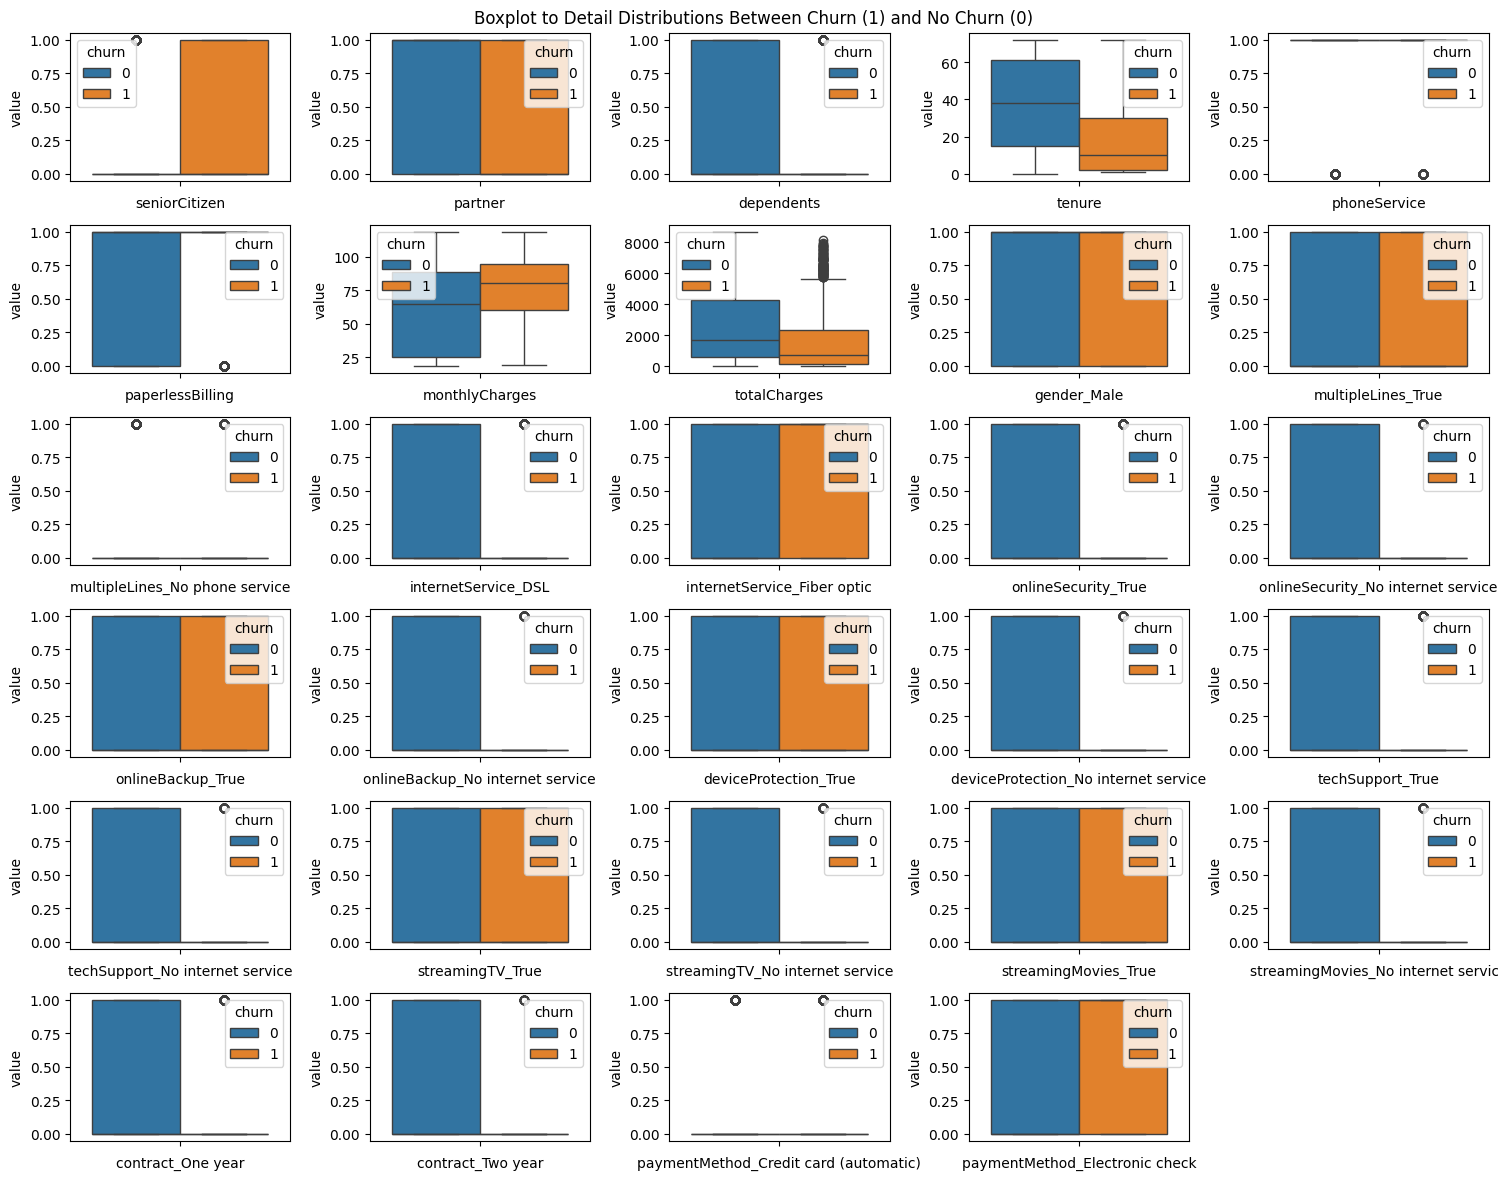

In [ ]:
fig, axis = plt.subplots(6, 5, figsize=(15, 12))

for ax, col in zip(axis.flatten(), df.drop('churn',axis=1).columns):
  ax = sns.boxplot(data=df, y=col, hue='churn', ax=ax)
  ax.set(xlabel=col, ylabel='value')

for missing in range(-1,0):
  axis.flatten()[missing].remove()
plt.suptitle('Boxplot to Detail Distributions Between Churn (1) and No Churn (0)')
plt.tight_layout();

Dropping the **partner** for training because doesn't seem to distinguish classes well

In [ ]:
X = df.drop(['partner', 'churn'], axis=1)
y = df.churn

In [ ]:
from sklearn.pipeline import Pipeline # faster technique for fitting model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

### Baseline Model (with balanced classes used in training so model doesn't overlook minority (churn) class)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=0
) # used stratify parameter to ensure split maintains same proportion of churn and non-churn classes in training and validation

In [ ]:
y_train.value_counts()

,count
churn,
0,3335
1,1202


In [ ]:
y_valid.value_counts()

,count
churn,
0,371
1,134


In [ ]:
baseline_log = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)

In [ ]:
baseline_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [ ]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.8 MB/s eta 0:00:00


In [ ]:
from dmba import classificationSummary

In [ ]:
class_names = ['no churn', 'churn']

In [ ]:
y_valid.value_counts()

,count
churn,
0,371
1,134


In [ ]:
classificationSummary(y_valid, baseline_log.predict(X_valid), class_names=class_names)

Confusion Matrix (Accuracy 0.7644)

         Prediction
  Actual no churn    churn
no churn      277       94
   churn       25      109


Baseline model has roughly 76% accuracy rate and a 24% misclassification rate.

Missed 25 customers who did in fact churn so will try and bring that number down.

 - **TPR**: 81.34%
 - **FNR**: 18.66%

### Model with Standardizing the Features since some of features (monthlyCharges and totalCharges) are on drastically different scales:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### MinMaxMaxScaler

In [ ]:
minmax_base = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, random_state=0))
])

In [ ]:
minmax_base.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, random_state=0))])

In [ ]:
classificationSummary(y_valid, minmax_base.predict(X_valid), class_names=class_names)

Confusion Matrix (Accuracy 0.7545)

         Prediction
  Actual no churn    churn
no churn      272       99
   churn       25      109


Slightly worse performance when normalizing inputs using MinMaxScaler.

### StandardScaler

In [ ]:
standScaling_base = Pipeline([
    ('standard', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=0))
])

In [ ]:
standScaling_base.fit(X_train,y_train)

Pipeline(steps=[('standard', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, random_state=0))])

In [ ]:
classificationSummary(y_valid, standScaling_base.predict(X_valid), class_names=class_names)

Confusion Matrix (Accuracy 0.7604)

         Prediction
  Actual no churn    churn
no churn      275       96
   churn       25      109


Decided to go forward fine-tuning the **Baseline model with Standardized input features because helped my model converge upon best solution and find optimal parameters for fitting**

In [ ]:
# accuracy rate and misclassification rate of baseline model

from sklearn.metrics import accuracy_score, zero_one_loss

In [ ]:
accuracy_score(y_valid, baseline_log.predict(X_valid)) *100

76.43564356435644

In [ ]:
# misclassification rate

zero_one_loss(y_valid, baseline_log.predict(X_valid))*100

23.564356435643564

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_valid, baseline_log.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82       371
           1       0.54      0.81      0.65       134

    accuracy                           0.76       505
   macro avg       0.73      0.78      0.74       505
weighted avg       0.82      0.76      0.78       505



Here we see that the **precision (TP/(TP+FP)); when model predicts correct, what % is actually correct)** is 54%. The **recall (% of class of interest correctly identified); (TP/(TP/FN)** is 81%. The **f1score (harmonic mean between precision and recall**) is 65%.

### ROC Curve

In [ ]:
np.array(y_valid)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
baseline_log.predict_proba(X_valid)

array([[0.27999258, 0.72000742],
       [0.85909736, 0.14090264],
       [0.8063217 , 0.1936783 ],
       ...,
       [0.66670612, 0.33329388],
       [0.97803447, 0.02196553],
       [0.89168105, 0.10831895]])

In [ ]:
len(y_valid), len(X_valid)

(505, 505)

In [ ]:
(y_valid.isnull()).any()

False

In [ ]:
roc_curve(y_valid, baseline_log.predict_proba(X_valid)[:,1]) #returns three arrays: FRPs, TPRs, Thresholds use to determine these metrics

(array([0.        , 0.        , 0.        , 0.00269542, 0.00269542,
        0.01078167, 0.01078167, 0.01347709, 0.01347709, 0.01617251,
        0.01617251, 0.01886792, 0.01886792, 0.02425876, 0.02425876,
        0.02695418, 0.02695418, 0.0296496 , 0.0296496 , 0.03234501,
        0.03234501, 0.04043127, 0.04043127, 0.04312668, 0.04312668,
        0.04851752, 0.04851752, 0.05121294, 0.05121294, 0.05390836,
        0.05390836, 0.06199461, 0.06199461, 0.06469003, 0.06469003,
        0.06738544, 0.06738544, 0.07277628, 0.07277628, 0.08086253,
        0.08086253, 0.08355795, 0.08355795, 0.08894879, 0.08894879,
        0.0916442 , 0.0916442 , 0.09433962, 0.09433962, 0.09973046,
        0.09973046, 0.10242588, 0.10242588, 0.10781671, 0.10781671,
        0.11051213, 0.11051213, 0.11320755, 0.11320755, 0.11859838,
        0.11859838, 0.12668464, 0.12668464, 0.12938005, 0.12938005,
        0.13477089, 0.13477089, 0.13746631, 0.13746631, 0.14016173,
        0.14016173, 0.15902965, 0.15902965, 0.16

In [ ]:
from sklearn.metrics import auc, roc_curve

In [ ]:
def plot_roc(y_valid, pred_probs, ax=None):
  if not ax:
    fig, ax=plt.subplots(1, 1)
  fpr, tpr, thresholds = roc_curve(y_valid, pred_probs)

  ax.plot(
      [0,1], [0, 1], color='blue', lw=2, linestyle='--', label='baseline'
  )

  ax.plot(fpr, tpr, color='green', lw=2, label='model')
  ax.legend(loc='lower right')
  ax.set_title('Roc Curve')
  ax.set_xlabel('False Positive Rate (FPR)')
  ax.set_ylabel('True Positive Rate (TPR)')
  ax.annotate(
      f'AUC: {auc(fpr, tpr):.2}', xy=(0.5,0),
      horizontalalignment='center'
  )

  return ax

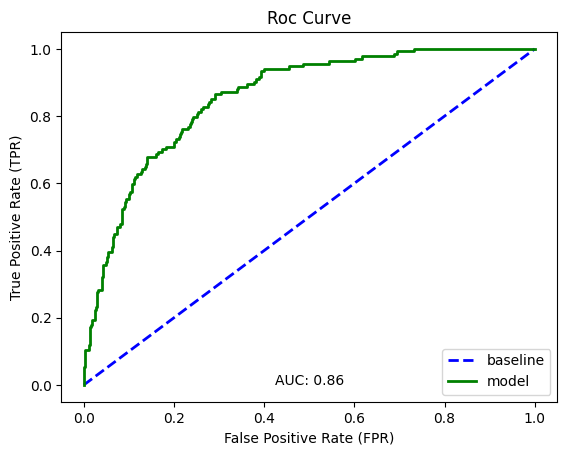

In [ ]:
plot_roc(y_valid, baseline_log.predict_proba(X_valid)[:,1]);

### Precision Recall Curve

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
def plot_pr_curve(y_valid, preds, positive_class=1, ax=None):
  precision, recall, thresh = precision_recall_curve(y_valid, preds)

  if not ax:
    fig, ax = plt.subplots()

  ax.axhline(
      sum(y_valid==positive_class)/len(y_valid), color='blue', lw=2, linestyle='--', label='baseline'
  )
  ax.plot(
      recall, precision, color='green', lw=2, label='model'
  )
  ax.legend()
  ax.set_title(
      'Precision-Recall Curve\n'
      f"""AP: {average_precision_score(y_valid, preds, pos_label=positive_class):.2} | """
      f'AUC: {auc(recall, precision):.2}'
  )
  ax.set(xlabel='Recall', ylabel='Precision')
  ax.set_xlim(-0.05, 1.05)
  ax.set_ylim(-0.05, 1.05)
  return ax

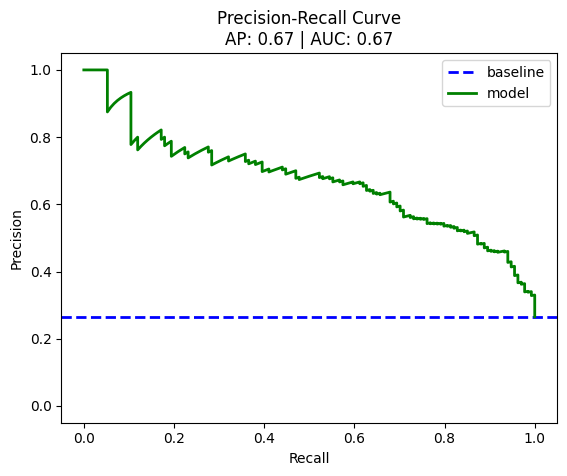

In [ ]:
plot_pr_curve(
    y_valid, baseline_log.predict_proba(X_valid)[:,1]
);

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'fit_intercept': [False, True]
}

In [ ]:
grid_log = GridSearchCV(
    log_model, param_grid, scoring='recall', cv=5
)

In [ ]:
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'fit_intercept': [False, True],
                         'max_iter': [100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='recall')

In [ ]:
grid_log.best_params_

{'C': 0.1,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
grid_log.best_score_

0.8128181189488244

In [ ]:
best_libLinear = grid_log.best_estimator_

In [ ]:
classificationSummary(y_valid, best_libLinear.predict(X_valid), class_names=class_names)

Confusion Matrix (Accuracy 0.7624)

         Prediction
  Actual no churn    churn
no churn      274       97
   churn       23      111


In [ ]:
print(classification_report(y_valid, best_libLinear.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       371
           1       0.53      0.83      0.65       134

    accuracy                           0.76       505
   macro avg       0.73      0.78      0.73       505
weighted avg       0.82      0.76      0.77       505



In [ ]:
pipeline = Pipeline([
    ('standardScaling', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced',random_state=0))
])

In [ ]:
param_grid = [
    {
        'lr__solver': ['lbfgs', 'newton-cg'],
        'lr__penalty': ['l2'],
        'lr__max_iter': [100, 1000],
        'lr__C': [0.01, 0.1, 1, 10],
        'lr__fit_intercept': [False, True]
    }
]

In [ ]:
grid_l2_log = GridSearchCV(
    pipeline, param_grid, scoring='recall', cv=5
)

In [ ]:
grid_l2_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScaling', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0))]),
             param_grid=[{'lr__C': [0.01, 0.1, 1, 10],
                          'lr__fit_intercept': [False, True],
                          'lr__max_iter': [100, 1000], 'lr__penalty': ['l2'],
                          'lr__solver': ['lbfgs', 'newton-cg']}],
             scoring='recall')

In [ ]:
grid_l2_log.best_params_

{'lr__C': 10,
 'lr__fit_intercept': False,
 'lr__max_iter': 100,
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs'}

In [ ]:
best_l2_log = grid_l2_log.best_estimator_

In [ ]:
classificationSummary(y_valid, best_l2_log.predict(X_valid), class_names=class_names)

Confusion Matrix (Accuracy 0.7149)

         Prediction
  Actual no churn    churn
no churn      242      129
   churn       15      119


In [ ]:
print(classification_report(y_valid, best_l2_log.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       371
           1       0.48      0.89      0.62       134

    accuracy                           0.71       505
   macro avg       0.71      0.77      0.70       505
weighted avg       0.82      0.71      0.73       505



### Current best model to identify Churn ^

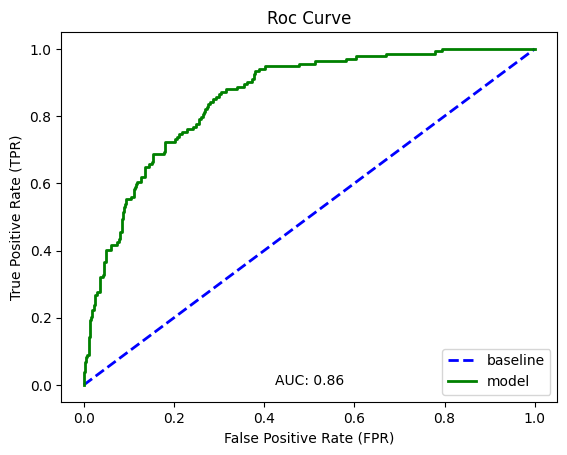

In [ ]:
plot_roc(y_valid, best_l2_log.predict_proba(X_valid)[:,1]);

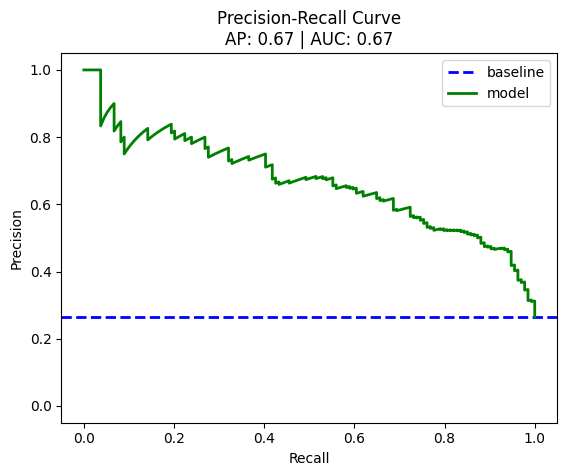

In [ ]:
plot_pr_curve(y_valid, best_l2_log.predict_proba(X_valid)[:,1]);

## Decision Tree

Will next use a decision tree for to further assist in feature selection of data (ie distinguishing important features from non important features) for more parsimonious model

In new file ^